In [4]:
from shapely.geometry import Point, Polygon
import geopandas as gpd

import matplotlib.pyplot as plt

# Load the GeoJSON data into a GeoDataFrame
parks_gdf = gpd.read_file("https://data.cityofnewyork.us/api/geospatial/rjaj-zgq7?method=export&format=GeoJSON")

# Inspect the first few rows of the GeoDataFrame
parks_gdf.head()


,propname,retireddate,zipcode,acres,location,nys_assembly,councildistrict,description,us_congress,gispropnum,retired,communityboard,department,subcategory,precinct,omppropid,sitename,nys_senate,borough,geometry
0,Marcus Garvey Park,,10027,0.15435469,124 St Btwn 5 Ave And Mt Morris Park West,68,9,Marcus Garvey Memorial Park-Marcus Garvey Memo...,13,M058,False,111,M-11,Plgd Within Park,25,M058-07,Marcus Garvey Memorial Park,30,M,"MULTIPOLYGON (((-73.94378 40.80593, -73.94352 ..."
1,Marcus Garvey Park,,10027,0.16204716,5 Ave Nr Madison & 124 St,68,9,Marcus Garvey Memorial Park-Marcus Garvey Memo...,13,M058,False,111,M-11,Plgd Within Park,25,M058-06,Marcus Garvey Memorial Park,30,M,"MULTIPOLYGON (((-73.94196 40.80523, -73.94195 ..."
2,Marcus Garvey Park,,10027,0.31619017,E 121st & Madison Ave,68,9,Marcus Garvey Memorial Park-Mt. Morris East,13,M058,False,111,M-11,Plgd Within Park,25,M058-01,Mt. Morris East,30,M,"MULTIPOLYGON (((-73.94298 40.80315, -73.94295 ..."
3,Thomas Jefferson Park,,10029,0.33302291,E 111 St & 1 Ave,68,8,Thomas Jefferson Park-Thomas Jefferson Park,13,M047,False,111,M-11,Plgd Within Park,23,M047-03,Thomas Jefferson Park,30,M,"MULTIPOLYGON (((-73.93583 40.79214, -73.93550 ..."
4,Wagner Houses Pool,,10035,1.11138215,E 124 St Bet 1 & 2 Aves,68,8,Wagner Pool-Othmar Ammann Playground,13,M273,False,111,M-11,Plgd Within Park,25,M273-01,Othmar Ammann Playground,30,M,"MULTIPOLYGON (((-73.93278 40.80150, -73.93262 ..."


In [5]:
parks_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
# Ensure the GeoDataFrame is using a projected coordinate system for area calculation
# EPSG:2263 is for New York Long Island (feet)
parks_gdf = parks_gdf.to_crs(epsg=2263)  

# Calculate the area of each park in square feet
parks_gdf['area'] = parks_gdf.geometry.area
parks_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   propname         888 non-null    object  
 1   retireddate      888 non-null    object  
 2   zipcode          888 non-null    object  
 3   acres            888 non-null    object  
 4   location         888 non-null    object  
 5   nys_assembly     888 non-null    object  
 6   councildistrict  888 non-null    object  
 7   description      888 non-null    object  
 8   us_congress      888 non-null    object  
 9   gispropnum       888 non-null    object  
 10  retired          888 non-null    object  
 11  communityboard   888 non-null    object  
 12  department       888 non-null    object  
 13  subcategory      888 non-null    object  
 14  precinct         888 non-null    object  
 15  omppropid        888 non-null    object  
 16  sitename         888 non-null    obj

<Axes: >

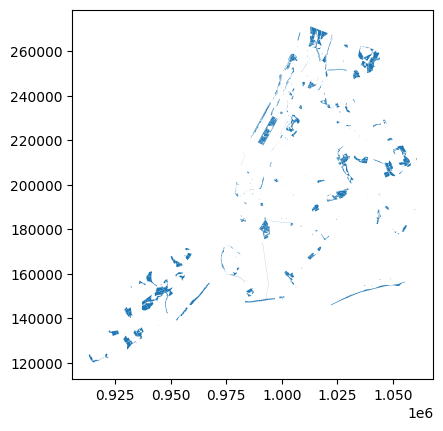

In [7]:
# Plot the parks
parks_gdf.plot()

In [8]:
# Check for missing values
print(parks_gdf.isnull().sum())

# Check the data types and attributes
print(parks_gdf.dtypes)

# Ensure all geometries are valid
parks_gdf = parks_gdf[parks_gdf.is_valid]

propname           0
retireddate        0
zipcode            0
acres              0
location           0
nys_assembly       0
councildistrict    0
description        0
us_congress        0
gispropnum         0
retired            0
communityboard     0
department         0
subcategory        0
precinct           0
omppropid          0
sitename           0
nys_senate         0
borough            0
geometry           0
area               0
dtype: int64
propname             object
retireddate          object
zipcode              object
acres                object
location             object
nys_assembly         object
councildistrict      object
description          object
us_congress          object
gispropnum           object
retired              object
communityboard       object
department           object
subcategory          object
precinct             object
omppropid            object
sitename             object
nys_senate           object
borough              object
geometry      

<Axes: >

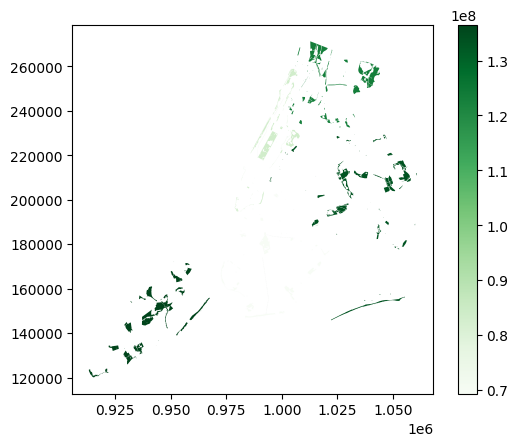

In [9]:
# Aggregate the data by borough and sum the park areas
park_areas_by_borough = parks_gdf.dissolve(by='borough', aggfunc='sum')
# Plot the results
park_areas_by_borough.plot(column='area', legend=True, cmap='Greens')

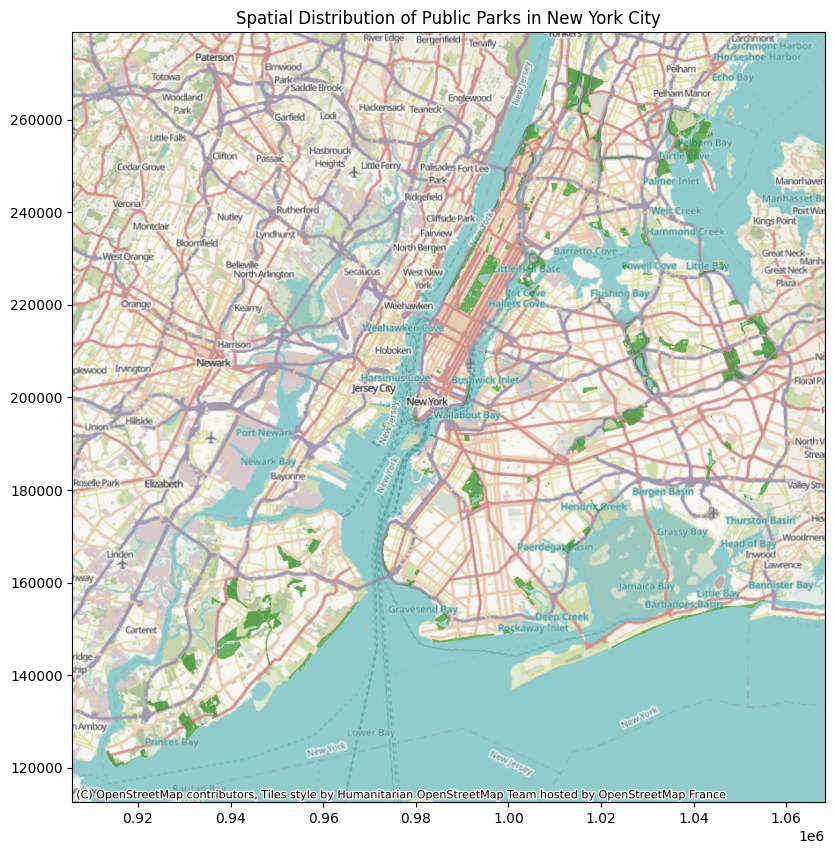

In [10]:
import matplotlib.pyplot as plt
import contextily as ctx

# Plot the parks
ax = parks_gdf.plot(figsize=(10, 10), color='green', alpha=0.5)
# Add a basemap
ctx.add_basemap(ax, crs=parks_gdf.crs.to_string())
# Set the title
ax.set_title("Spatial Distribution of Public Parks in New York City")
plt.show()

c:\Users\Ivy\IvyProjects\.venv\Lib\site-packages\IPython\core\interactiveshell.py:3490: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


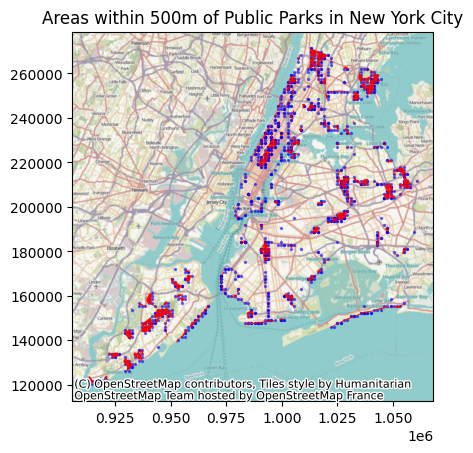

In [11]:
from geopandas.tools import sjoin
from shapely.geometry import Point
import numpy as np

# Create a grid of points across the city
x = np.linspace(parks_gdf.bounds.minx.min(), parks_gdf.bounds.maxx.max(), num=100)
y = np.linspace(parks_gdf.bounds.miny.min(), parks_gdf.bounds.maxy.max(), num=100)
xx, yy = np.meshgrid(x, y)
grid_points = gpd.GeoDataFrame(geometry=gpd.points_from_xy(xx.flatten(), yy.flatten()), crs=parks_gdf.crs)

# Create a buffer of 500 feet around each park (adjust the distance as needed)
parks_buffered = parks_gdf.buffer(500)

# Convert the buffered GeoSeries to a GeoDataFrame
parks_buffered_gdf = gpd.GeoDataFrame(geometry=parks_buffered)

# Perform the spatial join between grid points and buffered parks
points_near_parks = gpd.sjoin(grid_points, parks_buffered_gdf, how='inner', op='intersects')

# Visualize the result
ax = points_near_parks.plot(markersize=2, color='blue', alpha=0.5, label='Near Proximity to Parks')

parks_gdf.plot(ax=ax, color='red', alpha=1, label='Parks')

ctx.add_basemap(ax, crs=parks_gdf.crs.to_string())
ax.set_title("Areas within 500m of Public Parks in New York City")
plt.show()

<Axes: title={'center': 'Park Density per Borough (Parks per Square Mile)'}, xlabel='borough'>

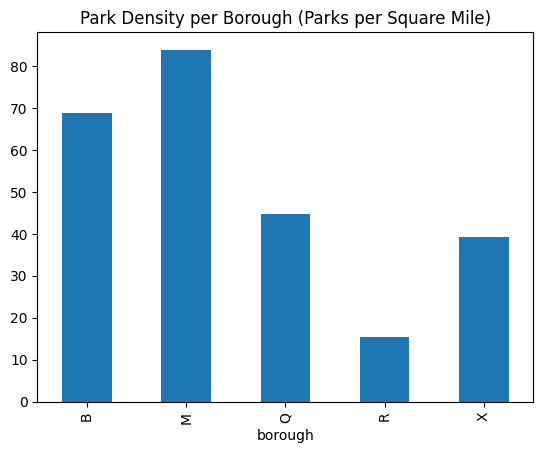

In [12]:
# Assuming the parks_gdf has a 'borough' column and is projected in EPSG:2263 for area calculation in feet
borough_area = parks_gdf.dissolve(by='borough', aggfunc='sum')['area']

# Count the number of parks in each borough
park_count = parks_gdf['borough'].value_counts()

# Calculate park density per square mile (since the area is in square feet, we convert it to square miles)
park_density = park_count / (borough_area / (5280**2))

# Plot park density
park_density.plot(kind='bar', title='Park Density per Borough (Parks per Square Mile)')


In [23]:
parks_gdf.columns

Index(['propname', 'retireddate', 'zipcode', 'acres', 'location',
       'nys_assembly', 'councildistrict', 'description', 'us_congress',
       'gispropnum', 'retired', 'communityboard', 'department', 'subcategory',
       'precinct', 'omppropid', 'sitename', 'nys_senate', 'borough',
       'geometry', 'area'],
      dtype='object')

In [21]:
largest_park

propname                                            Richmond Parkway
retireddate                                                         
zipcode                                                        10314
acres                                                   148.40234377
location           Victory Blvd & Forest Hill Rd, East Of Rocklan...
nys_assembly                                                      63
councildistrict                                                   50
description             S.I. Greenbelt-Willowbrook Park Natural Area
us_congress                                                       11
gispropnum                                                      R030
retired                                                        False
communityboard                                                   502
department                                                      R-02
subcategory                                          Large Park Zone
precinct                          

In [24]:
smallest_park

propname                                             Blue Heron Park
retireddate                                                         
zipcode                                                        10312
acres                                                     0.03356331
location           Next To Nature Ctr At 222 Poillon Ave, Btw Amb...
nys_assembly                                                      62
councildistrict                                                   51
description                    Blue Heron Park - Blue Heron Tot Lot1
us_congress                                                       11
gispropnum                                                      R119
retired                                                        False
communityboard                                                   503
department                                                      R-03
subcategory                                         Plgd Within Park
precinct                          

In [26]:
# Largest park
largest_park = parks_gdf.iloc[parks_gdf['area'].idxmax()]
# Smallest park
smallest_park = parks_gdf.iloc[parks_gdf['area'].idxmin()]
print(f"Largest Park: {largest_park['propname']} in {largest_park['description']}, Area: {largest_park['area']} square feet")
print(f"Smallest Park: {smallest_park['propname']} in {smallest_park['description']}, Area: {smallest_park['area']} square feet")

Largest Park: Richmond Parkway in S.I. Greenbelt-Willowbrook Park Natural Area, Area: 6492278.962697325 square feet
Smallest Park: Blue Heron Park in Blue Heron Park - Blue Heron Tot Lot1, Area: 1453.3752954572674 square feet


In [31]:
from shapely.geometry import Point

# Define points of interest with their latitude and longitude coordinates
points_of_interest = {
    'Times Square': (-73.9855, 40.7580),
    'Central Park': (-73.9654, 40.7829),
    'Brooklyn Bridge': (-73.9969, 40.7061)
}
# Convert points of interest to a GeoDataFrame
poi_gdf = gpd.GeoDataFrame(geometry=[Point(lon, lat) for lon, lat in points_of_interest.values()], crs="EPSG:4326")
poi_gdf = poi_gdf.to_crs(parks_gdf.crs)  # Convert to the same CRS as parks_gdf for accurate distance calculation

poi_gdf


,geometry
0,POINT (988267.074 215436.879)
1,POINT (993831.986 224510.338)
2,POINT (985109.492 196527.766)


In [32]:
# Assuming parks_gdf is your GeoDataFrame containing parks
if parks_gdf.sindex is not None:  # Check if spatial index exists
    for index, poi in poi_gdf.iterrows():
        # Query the spatial index for the nearest geometry to each point of interest
        # Pass the point geometry directly instead of its bounds
        nearest_index = list(parks_gdf.sindex.nearest(poi.geometry, return_all=True, max_distance=None))[0]
        nearest_park = parks_gdf.iloc[nearest_index[0]]  # Access the first nearest park if there are multiple

        # Calculate the distance to the nearest park (in the same units as the CRS)
        distance = poi.geometry.distance(nearest_park.geometry)
        print(f"Nearest park to {index}: {nearest_park.geometry}, Distance: {distance:.2f}")


Nearest park to 0: MULTIPOLYGON (((999815.0771255483 232904.68154991002, 999886.0490964619 232864.82565849175, 999886.9788846368 232864.77972682333, 999887.8906282185 232864.59173506344, 999888.762673717 232864.2659483261, 999889.574679972 232863.80991249095, 999890.3066338892 232863.23511049149, 999890.9418032123 232862.5543375859, 999891.4650961305 232861.7843259978, 999940.9807451366 232833.9776230872, 999963.2759761349 232875.22557206775, 999836.8871212993 232944.72083991388, 999815.0771255483 232904.68154991002))), Distance: 20939.93
Nearest park to 1: MULTIPOLYGON (((999815.0771255483 232904.68154991002, 999886.0490964619 232864.82565849175, 999886.9788846368 232864.77972682333, 999887.8906282185 232864.59173506344, 999888.762673717 232864.2659483261, 999889.574679972 232863.80991249095, 999890.3066338892 232863.23511049149, 999890.9418032123 232862.5543375859, 999891.4650961305 232861.7843259978, 999940.9807451366 232833.9776230872, 999963.2759761349 232875.22557206775, 999836.8

In [35]:
parks_gdf.head()

,propname,retireddate,zipcode,acres,location,nys_assembly,councildistrict,description,us_congress,gispropnum,...,communityboard,department,subcategory,precinct,omppropid,sitename,nys_senate,borough,geometry,area
0,Marcus Garvey Park,,10027,0.15435469,124 St Btwn 5 Ave And Mt Morris Park West,68,9,Marcus Garvey Memorial Park-Marcus Garvey Memo...,13,M058,...,111,M-11,Plgd Within Park,25,M058-07,Marcus Garvey Memorial Park,30,M,"MULTIPOLYGON (((999815.077 232904.682, 999886....",6669.386226
1,Marcus Garvey Park,,10027,0.16204716,5 Ave Nr Madison & 124 St,68,9,Marcus Garvey Memorial Park-Marcus Garvey Memo...,13,M058,...,111,M-11,Plgd Within Park,25,M058-06,Marcus Garvey Memorial Park,30,M,"MULTIPOLYGON (((1000318.465 232648.929, 100032...",7058.805985
2,Marcus Garvey Park,,10027,0.31619017,E 121st & Madison Ave,68,9,Marcus Garvey Memorial Park-Mt. Morris East,13,M058,...,111,M-11,Plgd Within Park,25,M058-01,Mt. Morris East,30,M,"MULTIPOLYGON (((1000036.662 231890.505, 100004...",20574.915580
3,Thomas Jefferson Park,,10029,0.33302291,E 111 St & 1 Ave,68,8,Thomas Jefferson Park-Thomas Jefferson Park,13,M047,...,111,M-11,Plgd Within Park,23,M047-03,Thomas Jefferson Park,30,M,"MULTIPOLYGON (((1002017.564 227881.773, 100210...",15448.096588
4,Wagner Houses Pool,,10035,1.11138215,E 124 St Bet 1 & 2 Aves,68,8,Wagner Pool-Othmar Ammann Playground,13,M273,...,111,M-11,Plgd Within Park,25,M273-01,Othmar Ammann Playground,30,M,"MULTIPOLYGON (((1002860.608 231290.719, 100290...",49288.794214


C:\Users\Ivy\AppData\Local\Temp\ipykernel_6444\2927969998.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Park Name', data=top_10_parks, palette='viridis')


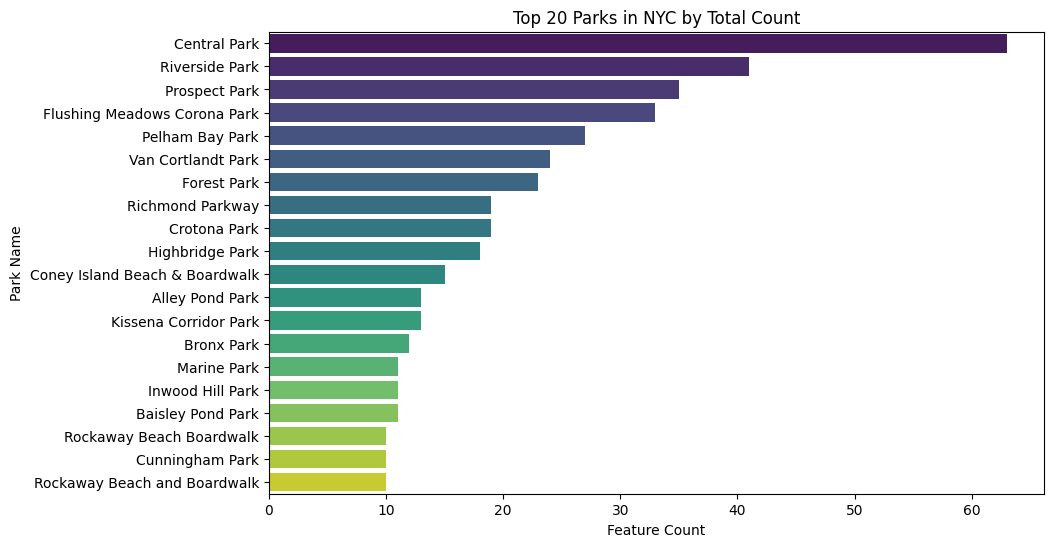

In [44]:
import seaborn as sns

# Assuming 'propname' column contains unique identifiers for parks
feature_counts = parks_gdf['propname'].value_counts()

# Select the top 10 most common property names (parks)
top_10_parks = feature_counts.head(20).reset_index()
top_10_parks.columns = ['Park Name', 'Count']

# Create a Seaborn bar plot for the top 10 parks
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Park Name', data=top_10_parks, palette='viridis')

# Add plot title and labels
plt.title('Top 20 Parks in NYC by Total Count')
plt.xlabel('Feature Count')
plt.ylabel('Park Name')

plt.show()


In [64]:
parks_gdf['park_ids'] = parks_gdf.index + 1
parks_gdf

,propname,retireddate,zipcode,acres,location,nys_assembly,councildistrict,description,us_congress,gispropnum,...,department,subcategory,precinct,omppropid,sitename,nys_senate,borough,geometry,area,park_ids
0,Marcus Garvey Park,,10027,0.15435469,124 St Btwn 5 Ave And Mt Morris Park West,68,9,Marcus Garvey Memorial Park-Marcus Garvey Memo...,13,M058,...,M-11,Plgd Within Park,25,M058-07,Marcus Garvey Memorial Park,30,M,"MULTIPOLYGON (((999815.077 232904.682, 999886....",6.669386e+03,1
1,Marcus Garvey Park,,10027,0.16204716,5 Ave Nr Madison & 124 St,68,9,Marcus Garvey Memorial Park-Marcus Garvey Memo...,13,M058,...,M-11,Plgd Within Park,25,M058-06,Marcus Garvey Memorial Park,30,M,"MULTIPOLYGON (((1000318.465 232648.929, 100032...",7.058806e+03,2
2,Marcus Garvey Park,,10027,0.31619017,E 121st & Madison Ave,68,9,Marcus Garvey Memorial Park-Mt. Morris East,13,M058,...,M-11,Plgd Within Park,25,M058-01,Mt. Morris East,30,M,"MULTIPOLYGON (((1000036.662 231890.505, 100004...",2.057492e+04,3
3,Thomas Jefferson Park,,10029,0.33302291,E 111 St & 1 Ave,68,8,Thomas Jefferson Park-Thomas Jefferson Park,13,M047,...,M-11,Plgd Within Park,23,M047-03,Thomas Jefferson Park,30,M,"MULTIPOLYGON (((1002017.564 227881.773, 100210...",1.544810e+04,4
4,Wagner Houses Pool,,10035,1.11138215,E 124 St Bet 1 & 2 Aves,68,8,Wagner Pool-Othmar Ammann Playground,13,M273,...,M-11,Plgd Within Park,25,M273-01,Othmar Ammann Playground,30,M,"MULTIPOLYGON (((1002860.608 231290.719, 100290...",4.928879e+04,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,Richmond Parkway,,"10314, 10306",213.34027746,"Richmond Ave, Forest Hill Rd, Richmond Hill Rd...",63,51,S.I. Greenbelt-Field of Dreams,11,R065,...,R-02,Large Park Zone,122,R065-ZN12,Field of Dreams,24,R,"MULTIPOLYGON (((938885.489 146886.291, 938739....",2.588176e+06,884
884,Richmond Parkway,,"10314, 10306",213.34027746,"Richmond Ave, Forest Hill Rd, Richmond Hill Rd...",63,51,S.I. Greenbelt-Southwest LaTourette,11,R065,...,R-02,Large Park Zone,122,R065-ZN13,Southwest LaTourette,24,R,"MULTIPOLYGON (((941358.132 149780.263, 941360....",2.708860e+06,885
885,Richmond Parkway,,10314,96.9048853,Rockland Ave & Forest Hill Rd - North Of Buck'...,63,50,S.I. Greenbelt-Northwest Latourette,11,R065,...,R-02,Large Park Zone,122,R065-ZN07,Northwest Latourette,24,R,"MULTIPOLYGON (((944765.339 151924.320, 944920....",4.537647e+06,886
886,Richmond Parkway,,10314,96.9048853,Rockland Ave & Forest Hill Rd - North Of Buck'...,63,50,S.I. Greenbelt-Southeast LaTourette,11,R065,...,R-02,Large Park Zone,122,R065-ZN16,Southeast LaTourette,24,R,"MULTIPOLYGON (((943266.030 148878.656, 943270....",2.339951e+06,887


In [68]:
import pandas as pd
import numpy as np

# Assuming parks_gdf has a unique identifier for each park, like 'park_id'
park_ids = parks_gdf.index + 1
parks_gdf['park_id'] = parks_gdf.index + 1

# Generate sample dates
dates = pd.date_range(start='2021-01-01', end='2021-12-31', freq='D')

# Create a DataFrame to hold the visitation data
visitation_data = []

for park_id in parks_gdf['park_id']:
    for date in dates:
        # Generate a random number of visitors (between 0 and 500) for each park and date
        visitors = np.random.randint(0, 500)
        visitation_data.append({'park_id': park_id, 'date': date, 'visitors': visitors})

# Convert the list to a DataFrame
vis_df = pd.DataFrame(visitation_data)

# Ensure we have at least 1000 rows
assert len(vis_df) >= 1000

# Show the first few rows of the visitation DataFrame
vis_df.head()


,park_id,date,visitors
0,1,2021-01-01,29
1,1,2021-01-02,452
2,1,2021-01-03,347
3,1,2021-01-04,297
4,1,2021-01-05,438


<Axes: title={'center': 'Overall Park Visitation Trends in 2021'}, xlabel='Date', ylabel='Total Visitors'>

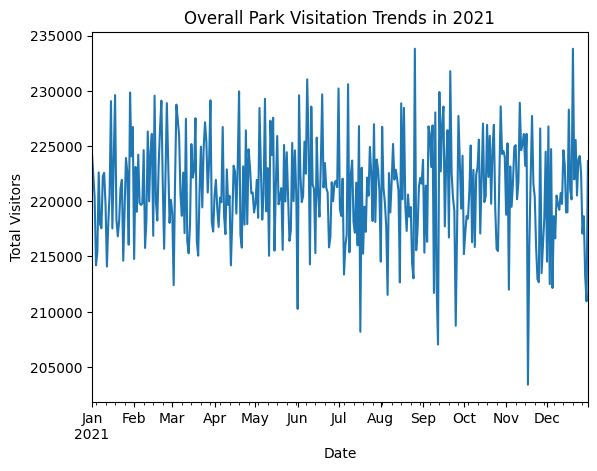

In [57]:
# Aggregate visitors by date to see overall trends
overall_trends = vis_df.groupby('date')['visitors'].sum()

# Plot overall visitation trends
overall_trends.plot(title='Overall Park Visitation Trends in 2021', ylabel='Total Visitors', xlabel='Date')

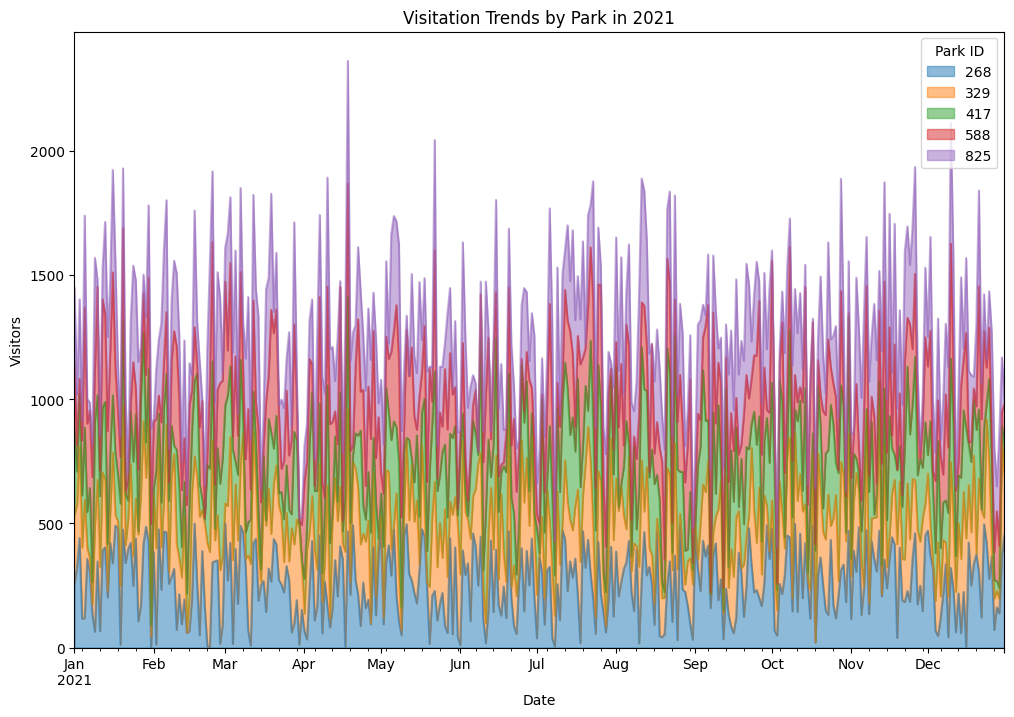

In [62]:
import matplotlib.pyplot as plt
# Select a subset of parks for comparison
sample_parks = np.random.choice(park_ids, size=5, replace=False)
# Filter visitation data for the selected parks
sample_vis_df = vis_df[vis_df['park_id'].isin(sample_parks)]
# Pivot the data for plotting
pivot_df = sample_vis_df.pivot(index='date', columns='park_id', values='visitors')
# Plot visitation trends by park using an area plot
pivot_df.plot(kind='area', figsize=(12, 8), stacked=True, title='Visitation Trends by Park in 2021', alpha=0.5)

# Customizing the plot
plt.ylabel('Visitors')
plt.xlabel('Date')
plt.legend(title='Park ID', loc='upper right')
plt.show()


In [66]:
# Find the top 10 days with the highest visitation
peak_days = overall_trends.nlargest(10)
# Print the peak visitation days
print("Peak Visitation Days:")
print(peak_days)

Peak Visitation Days:
date
2021-08-26    233804
2021-12-20    233801
2021-09-21    231767
2021-06-08    231030
2021-07-08    230587
2021-07-01    230203
2021-04-19    229936
2021-09-13    229887
2021-01-29    229840
2021-06-19    229670
Name: visitors, dtype: int64


In [70]:
# Merge the parks GeoDataFrame with the visitation DataFrame on 'park_id'
combined_gdf = parks_gdf.merge(vis_df, on='park_id')

# Inspect the combined GeoDataFrame
combined_gdf.head()


,propname,retireddate,zipcode,acres,location,nys_assembly,councildistrict,description,us_congress,gispropnum,...,omppropid,sitename,nys_senate,borough,geometry,area,park_ids,park_id,date,visitors
0,Marcus Garvey Park,,10027,0.15435469,124 St Btwn 5 Ave And Mt Morris Park West,68,9,Marcus Garvey Memorial Park-Marcus Garvey Memo...,13,M058,...,M058-07,Marcus Garvey Memorial Park,30,M,"MULTIPOLYGON (((999815.077 232904.682, 999886....",6669.386226,1,1,2021-01-01,29
1,Marcus Garvey Park,,10027,0.15435469,124 St Btwn 5 Ave And Mt Morris Park West,68,9,Marcus Garvey Memorial Park-Marcus Garvey Memo...,13,M058,...,M058-07,Marcus Garvey Memorial Park,30,M,"MULTIPOLYGON (((999815.077 232904.682, 999886....",6669.386226,1,1,2021-01-02,452
2,Marcus Garvey Park,,10027,0.15435469,124 St Btwn 5 Ave And Mt Morris Park West,68,9,Marcus Garvey Memorial Park-Marcus Garvey Memo...,13,M058,...,M058-07,Marcus Garvey Memorial Park,30,M,"MULTIPOLYGON (((999815.077 232904.682, 999886....",6669.386226,1,1,2021-01-03,347
3,Marcus Garvey Park,,10027,0.15435469,124 St Btwn 5 Ave And Mt Morris Park West,68,9,Marcus Garvey Memorial Park-Marcus Garvey Memo...,13,M058,...,M058-07,Marcus Garvey Memorial Park,30,M,"MULTIPOLYGON (((999815.077 232904.682, 999886....",6669.386226,1,1,2021-01-04,297
4,Marcus Garvey Park,,10027,0.15435469,124 St Btwn 5 Ave And Mt Morris Park West,68,9,Marcus Garvey Memorial Park-Marcus Garvey Memo...,13,M058,...,M058-07,Marcus Garvey Memorial Park,30,M,"MULTIPOLYGON (((999815.077 232904.682, 999886....",6669.386226,1,1,2021-01-05,438


In [71]:
# Aggregate visitation data to get the total visitors per park
total_visitors_per_park = combined_gdf.groupby('park_id')['visitors'].sum().reset_index()

# Merge this aggregated data back with parks_gdf to maintain the spatial data
parks_with_visitors_gdf = parks_gdf.merge(total_visitors_per_park, on='park_id')


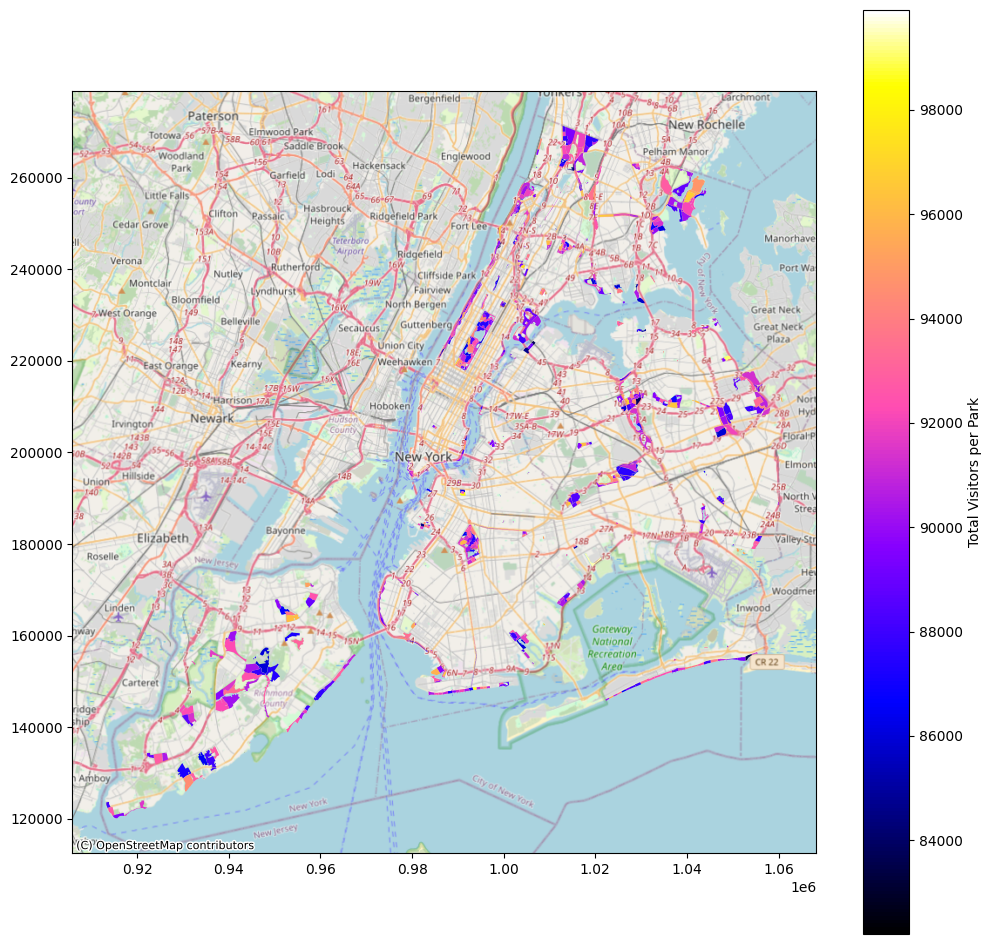

In [93]:
# Set up the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot parks, scaling the size of each park's point by the total visitors
# check this link to find cmap color: https://matplotlib.org/stable/users/explain/colors/colormaps.html
parks_with_visitors_gdf.plot(ax=ax, column='visitors', legend=True, legend_kwds={'label': "Total Visitors per Park"},
                             markersize=parks_with_visitors_gdf['visitors'] / 100,  # Scale marker size
                             cmap='gnuplot2')  # Use a color map

# Add basemap for reference (optional, requires contextily and Internet access)
try:
    import contextily as ctx
    ctx.add_basemap(ax, crs=parks_with_visitors_gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
except Exception as e:
    print(f"Couldn't add basemap due to: {e}")

# Show the plot
plt.show()


In [91]:
# import geopandas as gpd
# import contextily as ctx
# import matplotlib.pyplot as plt

# # Assuming parks_with_visitors_gdf is already prepared and in the right CRS

# # Set up the figure and axis
# fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# # Plot parks, scaling the size of each park's point by the total visitors
# # Here we're using a fixed size for demonstration, but you might want to scale it based on 'visitors'
# parks_with_visitors_gdf.plot(ax=ax, column='visitors', legend=True,
#                              legend_kwds={'label': "Total Visitors per Park"},
#                              markersize=parks_with_visitors_gdf['visitors'] / 100,  # Scale marker size
#                              color='hotpink')  # Using a bright, distinct color

# # Add basemap for reference
# ctx.add_basemap(ax, crs=parks_with_visitors_gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# # Remove axis clutter
# ax.set_axis_off()

# # Show the plot
# plt.show()


In [92]:
# # Set up the figure and axis
# fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# # Plot parks, scaling the size of each park's point by the total visitors
# parks_with_visitors_gdf.plot(ax=ax, column='visitors', legend=True, legend_kwds={'label': "Total Visitors per Park"},
#                              markersize=parks_with_visitors_gdf['visitors'] / 100,  # Scale marker size
#                              cmap='OrRd')  # Use a color map
# # Add basemap for reference (optional, requires contextily and Internet access)
# try:
#     import contextily as ctx
#     ctx.add_basemap(ax, crs=parks_with_visitors_gdf.crs.to_string(), source=ctx.providers.Stamen.OpenTopoMap)
# except Exception as e:
#     print(f"Couldn't add basemap due to: {e}")
# # Show the plot
# plt.show()